## Recall from the 3-GroupBy notebook

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Minimum Wage Data.csv")
df.head()

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.8,...,0.00000,0.00,0.00000,0.00,NaN
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.8,2.1,2.10000,15.61,2.10000,15.61,NaN
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.8,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.8,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.8,1.65(b),1.65000,12.26,1.65000,12.26,(b)


In [2]:
# act_min_wage = pd.DataFrame()
# for state_name, group in df.groupby("State"):
#     if act_min_wage.empty:
#         act_min_wage = group.set_index("Year")["State.Miminum.Wage"].to_frame().rename(columns={"State.Minimum.Wage":state_name})
#     else:
#         act_min_wage = act_min_wage.join(group.set_index("Year")["State.Miminum.Wage"].to_frame().rename(columns={"State.Miminum.Wage":state_name}))
act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")["State.Minimum.Wage"].to_frame().rename(columns={"State.Minimum.Wage":name})   #df.rename() to rename column, dict key is the one to be renamed
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")["State.Minimum.Wage"].to_frame().rename(columns={"State.Minimum.Wage":name}))

act_min_wage.head()

mod_min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()
mod_min_wage_corr.head()


,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Guam,Hawaii,Idaho,...,Oregon,Pennsylvania,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,0.981938,0.986455,0.970585,0.992234,0.971193,0.973326,0.979386,0.986835,0.958666,...,0.989706,0.959445,0.991785,0.980783,0.961031,0.992841,0.974007,0.984063,0.966210,0.876241
Arkansas,0.981938,1.000000,0.981222,0.974544,0.980991,0.971062,0.976168,0.975847,0.989265,0.951022,...,0.982317,0.957945,0.986417,0.984424,0.954685,0.982433,0.965271,0.983518,0.961117,0.816334
California,0.986455,0.981222,1.000000,0.987726,0.992328,0.969744,0.982806,0.967800,0.981436,0.946857,...,0.985984,0.946763,0.989798,0.974206,0.946546,0.992023,0.987628,0.977868,0.950854,0.873317
Colorado,0.970585,0.974544,0.987726,1.000000,0.980025,0.968148,0.986274,0.961301,0.973284,0.942145,...,0.977187,0.939117,0.980496,0.970238,0.940727,0.982147,0.982347,0.972318,0.943689,0.845495
Connecticut,0.992234,0.980991,0.992328,0.980025,1.000000,0.981611,0.972706,0.976996,0.984969,0.963695,...,0.993275,0.965274,0.994482,0.979789,0.964255,0.997531,0.984275,0.986163,0.971129,0.894385


## Plotting correlation

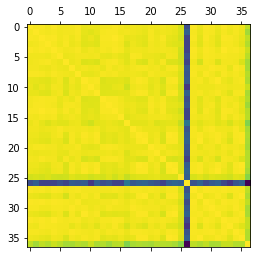

In [23]:
import matplotlib.pyplot as plt

plt.matshow(mod_min_wage_corr)
plt.show()

- This is pretty ugly and hard to tell the trend
- We want the x,y axes's labels to show the abbreviated state names

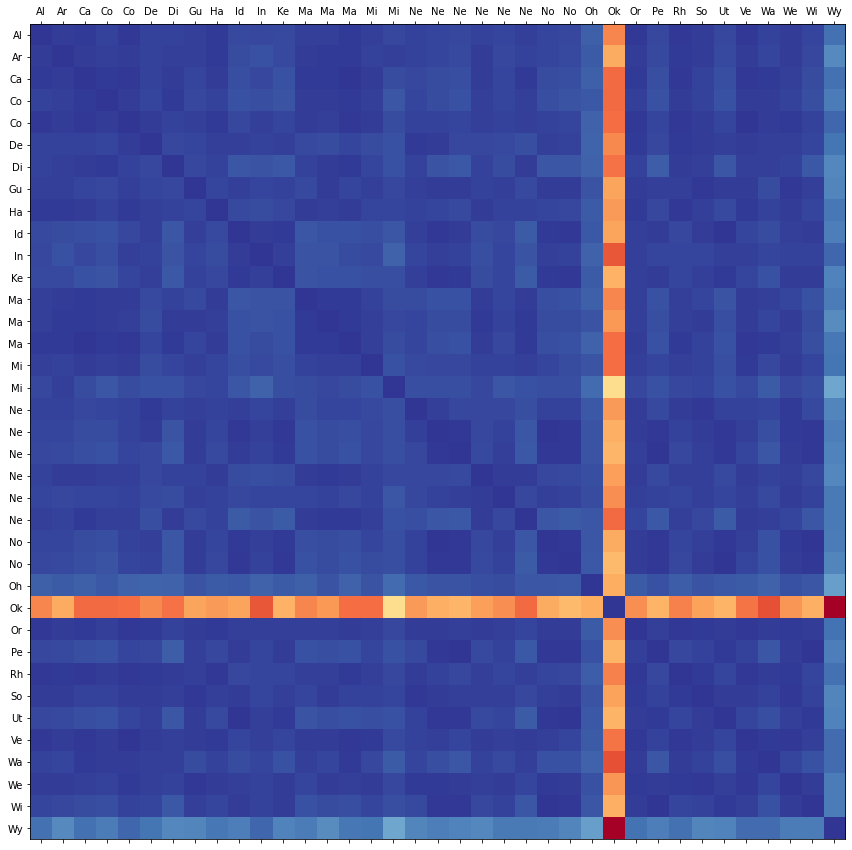

In [24]:
labels = [i[:2] for i in mod_min_wage_corr.columns]

fig = plt.figure(figsize = (15,15))    # figure so we can add axis
ax = fig.add_subplot(111)              # Define axis, so we can modify its label
ax.matshow(mod_min_wage_corr, cmap=plt.cm.RdYlBu)    #display the matrix, also choose colormap
ax.set_xticks(np.arange(len(labels)))    # Set the x axis's range
ax.set_yticks(np.arange(len(labels)))    # Set the x axis's range
ax.set_xticklabels(labels)             # Set the abbreviation array as labels
ax.set_yticklabels(labels)

plt.show()

### Problems:
- labels have collision, e.g. Ne
 
**Let's Actually crawl down the abbreviation table!!**

In [5]:
import requests

web = requests.get("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")
dfs = pd.read_html(web.text)    # will give us multiple DataFrames

for df in dfs:                  # We want the first df
    print(df.head())
    print("\n")


  State/District Abbreviation Postal Code
0        Alabama         Ala.          AL
1         Alaska       Alaska          AK
2        Arizona        Ariz.          AZ
3       Arkansas         Ark.          AR
4     California       Calif.          CA


        Territory/Associate Abbreviation Postal Code
0            American Samoa          NaN          AS
1                      Guam         Guam          GU
2          Marshall Islands          NaN          MH
3                Micronesia          NaN          FM
4  Northern Mariana Islands          NaN          MP




In [6]:
state_abbv = dfs[0]
state_abbv.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


Often sources decide to disable access, or disappear, so I may want to save this dataframe

In [7]:
state_abbv.to_csv("state_abbv.csv")

Bring it back:

In [8]:
state_abbv = pd.read_csv("state_abbv.csv")
state_abbv.head()

,Unnamed: 0,State/District,Abbreviation,Postal Code
0,0,Alabama,Ala.,AL
1,1,Alaska,Alaska,AK
2,2,Arizona,Ariz.,AZ
3,3,Arkansas,Ark.,AR
4,4,California,Calif.,CA


### Wut!? Double indexes!
- When you save to csv, it also saves the index
- When you load the csv back, it created the index again

### Fix:
- Save to csv with no index w/ **index flag**

In [11]:
state_abbv = state_abbv[["State/District", "Postal Code"]]    # Select two columns from a df
state_abbv.to_csv("state_abbv.csv", index=False)

In [12]:
state_abbv = pd.read_csv("state_abbv.csv", index_col=0)    # index_col=0 to directly use our first column as index
state_abbv.head()

,Postal Code
State/District,
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
California,CA


In [13]:
abbv_dict = state_abbv.to_dict()
abbv_dict

{'Postal Code': {'Alabama': 'AL',
  'Alaska': 'AK',
  'Arizona': 'AZ',
  'Arkansas': 'AR',
  'California': 'CA',
  'Colorado': 'CO',
  'Connecticut': 'CT',
  'Delaware': 'DE',
  'District of Columbia': 'DC',
  'Florida': 'FL',
  'Georgia': 'GA',
  'Hawaii': 'HI',
  'Idaho': 'ID',
  'Illinois': 'IL',
  'Indiana': 'IN',
  'Iowa': 'IA',
  'Kansas': 'KS',
  'Kentucky': 'KY',
  'Louisiana': 'LA',
  'Maine': 'ME',
  'Maryland': 'MD',
  'Massachusetts': 'MA',
  'Michigan': 'MI',
  'Minnesota': 'MN',
  'Mississippi': 'MS',
  'Missouri': 'MO',
  'Montana': 'MT',
  'Nebraska': 'NE',
  'Nevada': 'NV',
  'New Hampshire': 'NH',
  'New Jersey': 'NJ',
  'New Mexico': 'NM',
  'New York': 'NY',
  'North Carolina': 'NC',
  'North Dakota': 'ND',
  'Ohio': 'OH',
  'Oklahoma': 'OK',
  'Oregon': 'OR',
  'Pennsylvania': 'PA',
  'Rhode Island': 'RI',
  'South Carolina': 'SC',
  'South Dakota': 'SD',
  'Tennessee': 'TN',
  'Texas': 'TX',
  'Utah': 'UT',
  'Vermont': 'VT',
  'Virginia': 'VA',
  'Washington': 'W

- df.to_dict():  
{"column_name": {"row_name":"row_value"}}
- We only want the value corresponding to the "Postal Code" key 

In [14]:
abbv_dict = abbv_dict["Postal Code"]
abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

### Now we can redo our labels with this abbv_dict:

In [15]:
labels = [abbv_dict[i] for i in mod_min_wage_corr.columns]

KeyError: 'Guam'

That was unexpected.. since its just one key, hard code to fix it

In [27]:
abbv_dict["Guam"] = "Gu"
labels = [abbv_dict[i] for i in mod_min_wage_corr.columns]
labels

['AK',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'DC',
 'Gu',
 'HI',
 'ID',
 'IN',
 'KY',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SD',
 'UT',
 'VT',
 'WA',
 'WV',
 'WI',
 'WY']

### Back to our graph:

[Text(0, 0, 'AK'),
 Text(0, 1, 'AR'),
 Text(0, 2, 'CA'),
 Text(0, 3, 'CO'),
 Text(0, 4, 'CT'),
 Text(0, 5, 'DE'),
 Text(0, 6, 'DC'),
 Text(0, 7, 'Gu'),
 Text(0, 8, 'HI'),
 Text(0, 9, 'ID'),
 Text(0, 10, 'IN'),
 Text(0, 11, 'KY'),
 Text(0, 12, 'ME'),
 Text(0, 13, 'MD'),
 Text(0, 14, 'MA'),
 Text(0, 15, 'MI'),
 Text(0, 16, 'MN'),
 Text(0, 17, 'NE'),
 Text(0, 18, 'NV'),
 Text(0, 19, 'NH'),
 Text(0, 20, 'NJ'),
 Text(0, 21, 'NM'),
 Text(0, 22, 'NY'),
 Text(0, 23, 'NC'),
 Text(0, 24, 'ND'),
 Text(0, 25, 'OH'),
 Text(0, 26, 'OK'),
 Text(0, 27, 'OR'),
 Text(0, 28, 'PA'),
 Text(0, 29, 'RI'),
 Text(0, 30, 'SD'),
 Text(0, 31, 'UT'),
 Text(0, 32, 'VT'),
 Text(0, 33, 'WA'),
 Text(0, 34, 'WV'),
 Text(0, 35, 'WI'),
 Text(0, 36, 'WY')]

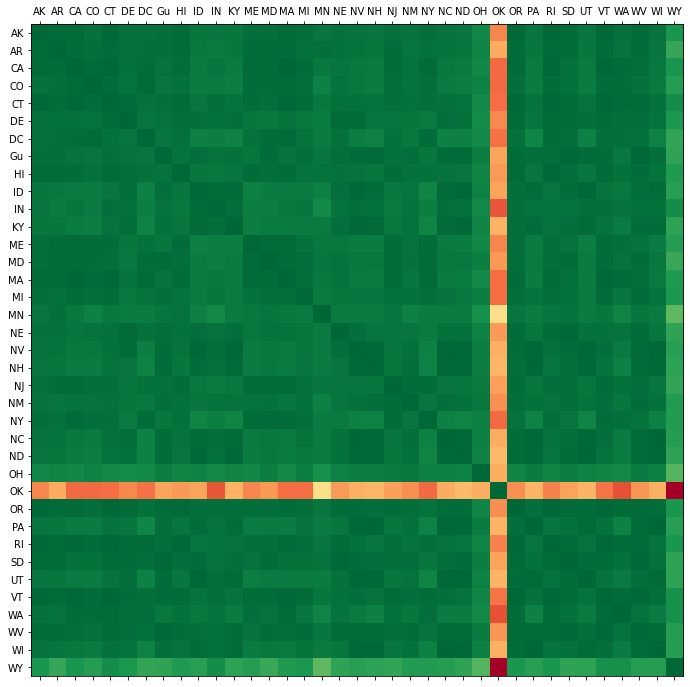

In [28]:
fig = plt.figure(figsize=(12,12))  # Have a figure to adda axis
ax = fig.add_subplot(111)         # define the axes
ax.matshow(mod_min_wage_corr, cmap=plt.cm.RdYlGn)    # Display the matrix
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)